# Importing Libraries

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading Dataset

In [297]:
df=pd.read_csv(r'D:\Data Science\Project\Black Friday Sales Analysis\Black Friday Sales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Size of the Dataset

In [218]:
df.shape

(550068, 12)

# map the cities into 0,1,2

In [287]:
df.City_Category = df.City_Category.map({'A':0,'B':1, 'C':2})

# map the Stay_In_Current_City_Years into numerical values

In [298]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [299]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.map({'0':0,'1':1, '2':2, '3':3,'4+':4})

# About Dataset

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


# Checking null values

In [221]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# replacing the null values

In [222]:
df.fillna(value=0,inplace=True)
#The null values for Product_Category_2 and Product_Category_3 says that the concerned person did not buy the products from these categories.Hence it can be replaced by 0.

In [223]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Unique values in each columns


In [224]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [225]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [226]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
df['Age'] = df['Age'].apply(map_age)

In [227]:
df['Age'].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

# Encode male as 0 and female as 1


In [228]:
df['Gender'].replace(['F','M'],[1,0], inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,6,16,2,4+,0,8,0.0,0.0,7969


# Skewness and Kurtosis

In [229]:
#Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.
skewness=df['Purchase'].skew()
skewness
#A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values

0.6001400037087128

In [230]:
#Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution
kurtosis=df['Purchase'].kurtosis()
kurtosis
#given distribution has a kurtosis less than 3, it is said to be platykurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution

-0.3383775655851702

# Distribution Plot

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


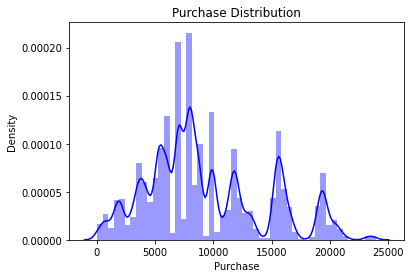

In [231]:
# Distribution plot for purchase 
sns.distplot(df["Purchase"],color='b')
plt.title("Purchase Distribution")
plt.show()

In [232]:
#We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


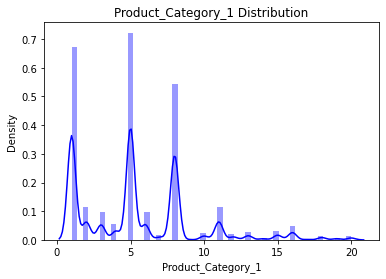

In [233]:
# Distribution plot for Product_Category_1
sns.distplot(df["Product_Category_1"],color='b')
plt.title("Product_Category_1 Distribution")
plt.show()

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


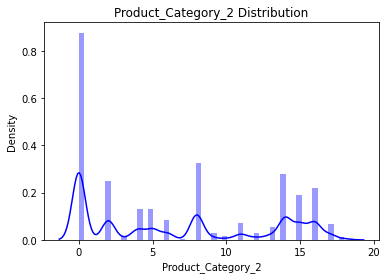

In [234]:
# Distribution plot for Product_Category_2
sns.distplot(df["Product_Category_2"],color='b')
plt.title("Product_Category_2 Distribution")
plt.show()

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


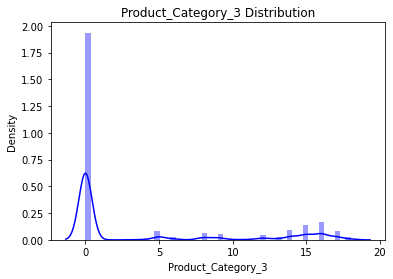

In [235]:
# Distribution plot for Product_Category_3
sns.distplot(df["Product_Category_3"],color='b')
plt.title("Product_Category_3 Distribution")
plt.show()

# Purchase based on marital Status

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


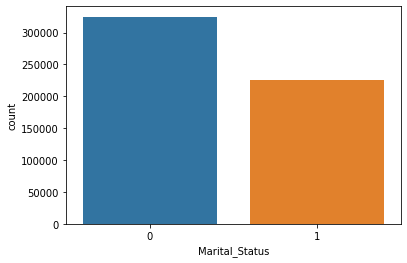

In [236]:
sns.countplot(df['Marital_Status'])
plt.show()

In [237]:
df.groupby("Marital_Status").mean()["Purchase"]
#There are more unmarried people in the dataset who purchase more

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

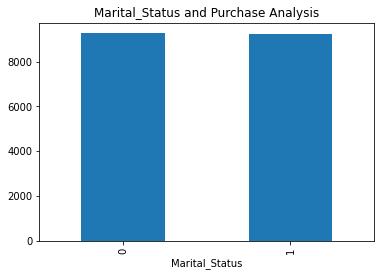

In [238]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()
# unmarried people spend more on purchasing but the average purchase amount of married and unmarried people are the same.

# Purchase based on Gender


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


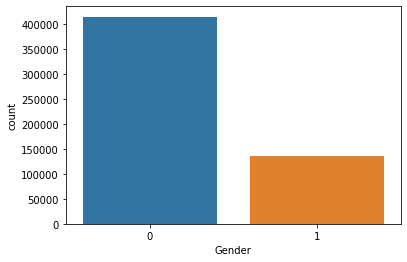

In [239]:
sns.countplot(df['Gender'])
plt.show()
#On average the male gender purchases more

In [240]:
df.groupby("Gender").mean()["Purchase"]
#On average the male gender spends more money on purchase contrary to female

Gender
0    9437.526040
1    8734.565765
Name: Purchase, dtype: float64

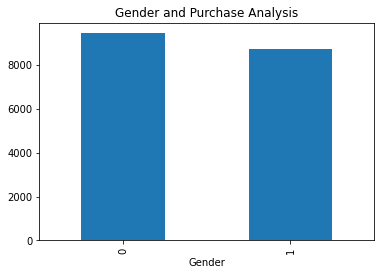

In [241]:
df.groupby("Gender").mean()["Purchase"].plot(kind='bar')
plt.title("Gender and Purchase Analysis")
plt.show()
#On average the male gender spends more money on purchase contrary to female

# Purchase based on Age


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


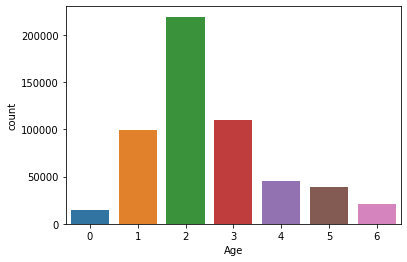

In [242]:
sns.countplot(df['Age'])
plt.show()
#On average the age category 26-35 purchases more.

In [243]:
df.groupby("Age").mean()["Purchase"]
#On average the age category 51-55 spends more money.

Age
0    8933.464640
1    9169.663606
2    9252.690633
3    9331.350695
4    9208.625697
5    9534.808031
6    9336.280459
Name: Purchase, dtype: float64

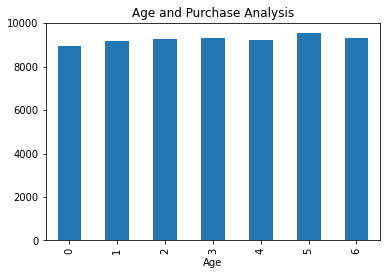

In [244]:
df.groupby("Age").mean()["Purchase"].plot(kind='bar')
plt.title("Age and Purchase Analysis")
plt.show()
#On average the age category 51-55 spends more money,but age category 26-35 purchases more 

# Purchase based on Occupation


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


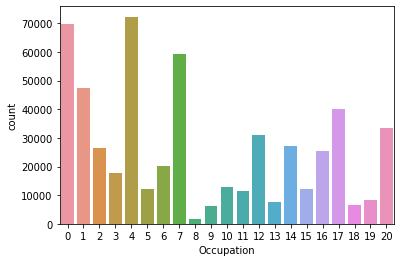

In [245]:
sns.countplot(df['Occupation'])
plt.show()
#Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [246]:
occup = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occup.head()

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251


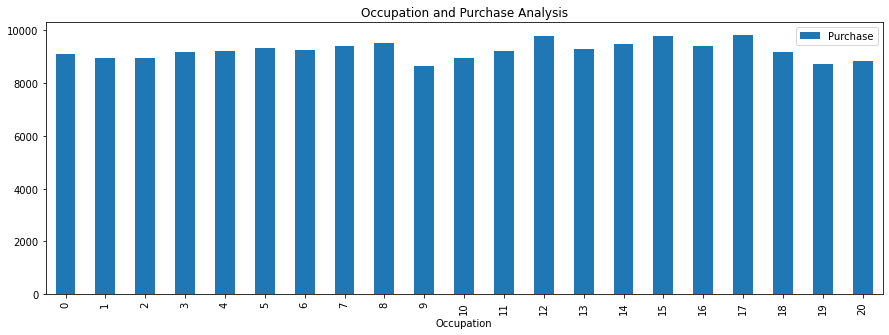

In [247]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()
#Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

# Purchase based on City

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


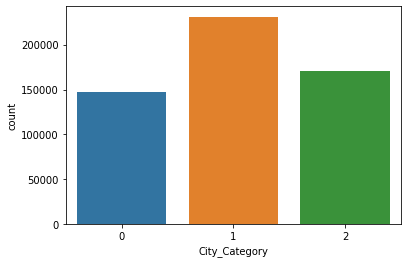

In [248]:
sns.countplot(df['City_Category'])
plt.show()
#It is observed that city category B has made the most number of purchases.

In [249]:
df.groupby("City_Category").mean()["Purchase"]

City_Category
0    8911.939216
1    9151.300563
2    9719.920993
Name: Purchase, dtype: float64

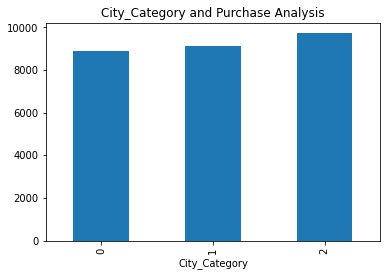

In [250]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City_Category and Purchase Analysis")
plt.show()
# the city whose buyers spend the most is city type ‘C’.

# Purchase based on Stay_In_Current_City_Years


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


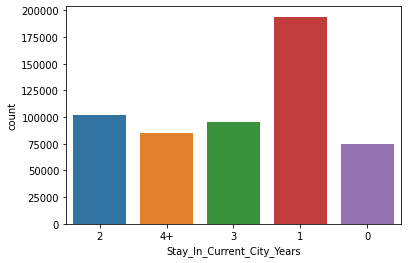

In [251]:
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()
#It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

In [252]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"]

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

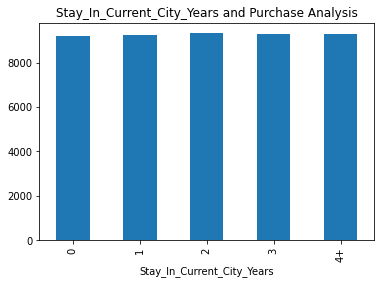

In [253]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()
#We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

# Purchase based on Product_Category_1

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


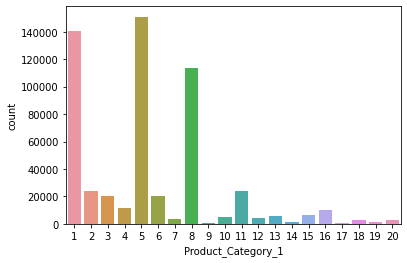

In [254]:
sns.countplot(df['Product_Category_1'])
plt.show()
#It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

In [255]:
df.groupby("Product_Category_1").mean()["Purchase"]

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

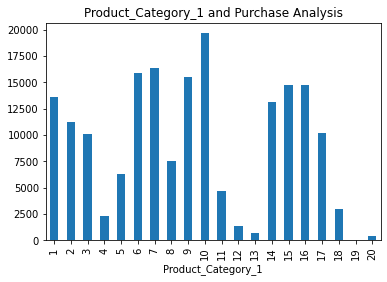

In [256]:
df.groupby("Product_Category_1").mean()["Purchase"].plot(kind='bar')
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()
#If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

# Purchase based on Product_Category_2

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


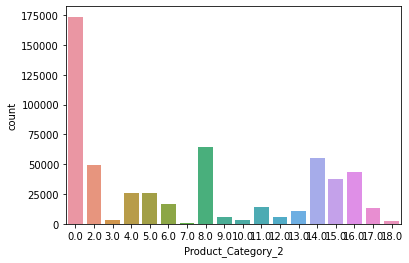

In [257]:
sns.countplot(df['Product_Category_2'])
plt.show()
#It is clear that Product_Category_2 numbers 1 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

In [258]:
df.groupby("Product_Category_2").mean()["Purchase"]

Product_Category_2
0.0      7518.695389
2.0     13619.356401
3.0     11235.359570
4.0     10215.192001
5.0      9027.821574
6.0     11503.551379
7.0      6884.683706
8.0     10273.259518
9.0      7277.006851
10.0    15648.729543
11.0     8940.580515
12.0     6975.472504
13.0     9683.352388
14.0     7105.264916
15.0    10357.077691
16.0    10295.681933
17.0     9421.576577
18.0     9352.440433
Name: Purchase, dtype: float64

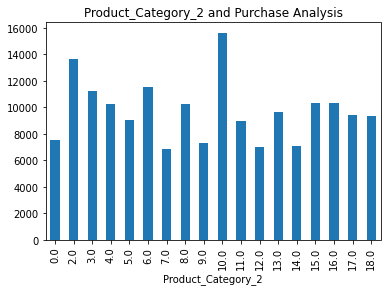

In [259]:
df.groupby("Product_Category_2").mean()["Purchase"].plot(kind='bar')
plt.title("Product_Category_2 and Purchase Analysis")
plt.show()
#If you see the value spent on average for Product_Category_2 you see that although there were more products bought for categories 1,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

# Purchase based on Product_Category_3

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


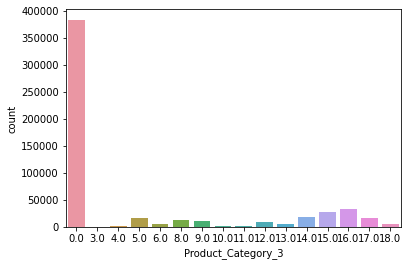

In [260]:
sns.countplot(df['Product_Category_3'])
plt.show()
#It is clear that Product_Category_2 numbers 1 stand out. Unfortunately we don't know which product each number represents as it is masked.

In [261]:
df.groupby("Product_Category_3").mean()["Purchase"]

Product_Category_3
0.0      8221.836943
3.0     13939.696574
4.0      9794.386667
5.0     12117.786889
6.0     13194.311043
8.0     13024.918882
9.0     10431.697210
10.0    13505.813441
11.0    12091.437673
12.0     8715.512762
13.0    13185.118703
14.0    10052.594530
15.0    12339.369900
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
Name: Purchase, dtype: float64

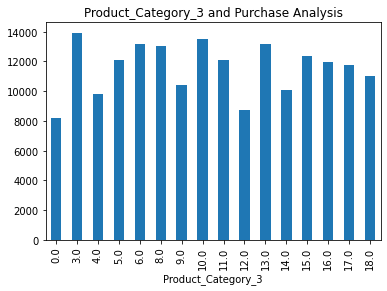

In [262]:
df.groupby("Product_Category_3").mean()["Purchase"].plot(kind='bar')
plt.title("Product_Category_3 and Purchase Analysis")
plt.show()
#If you see the value spent on average for Product_Category_3 you see that although there were more products bought for categories 1 the average amount spent for those three is not the highest.

# Correlation

In [263]:
df.corr()

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.033474,0.032698,-0.023971,0.022859,0.020443,0.003825,0.003896,0.003605,0.004716
Gender,0.033474,1.000000,0.004262,-0.117291,0.004515,0.011603,0.045594,0.000954,-0.036146,-0.060346
Age,0.032698,0.004262,1.000000,0.091463,0.123079,0.311738,0.061197,0.018770,-0.007422,0.015839
Occupation,-0.023971,-0.117291,0.091463,1.000000,0.034479,0.024280,-0.007618,0.006712,0.012269,0.020833
City_Category,0.022859,0.004515,0.123079,0.034479,1.000000,0.039790,-0.014364,0.016003,0.035525,0.061914
Marital_Status,0.020443,0.011603,0.311738,0.024280,0.039790,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,0.003825,0.045594,0.061197,-0.007618,-0.014364,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,0.003896,0.000954,0.018770,0.006712,0.016003,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.003605,-0.036146,-0.007422,0.012269,0.035525,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.004716,-0.060346,0.015839,0.020833,0.061914,-0.000463,-0.343703,0.052288,0.288501,1.000000


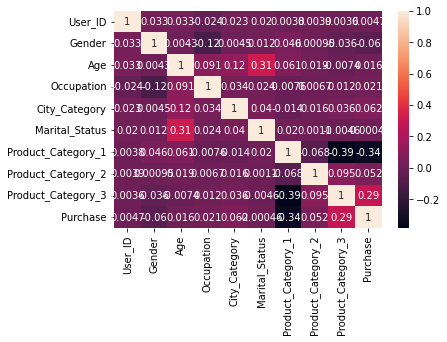

In [264]:
sns.heatmap(df.corr(),annot=True)
plt.show()
#There is a some corellation between the product category groups.

# Bivariate Analysis

# Exploring the purchase count with age and gender

In [265]:
newdf=pd.read_csv(r'D:\Data Science\Project\Black Friday Sales Analysis\Black Friday Sales.csv')
newdf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

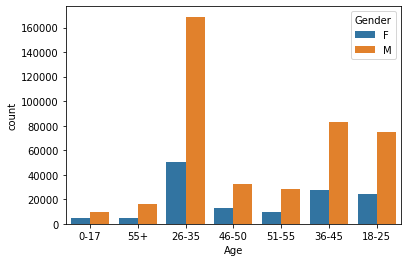

In [266]:
sns.countplot(newdf["Age"],hue=newdf["Gender"])

# Exploring the purchase count with City and gender

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

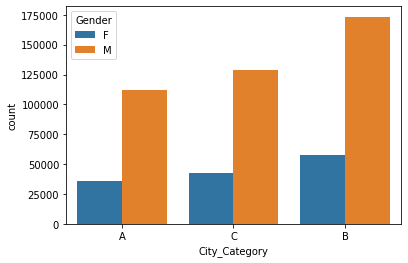

In [267]:
sns.countplot(newdf["City_Category"],hue=newdf["Gender"])

# Exploring the purchase count with Occupation and gender


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

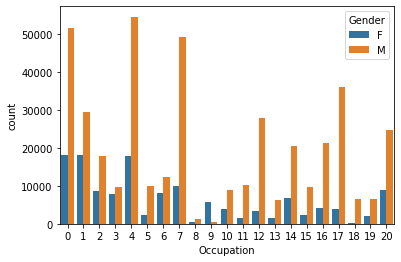

In [268]:
sns.countplot(newdf["Occupation"],hue=newdf["Gender"])

# Exploring the purchase count with marital status and gender


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

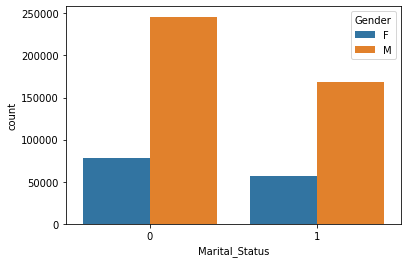

In [269]:
sns.countplot(newdf["Marital_Status"],hue=newdf["Gender"])

# Exploring the purchase count with Product_Categories and gender


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

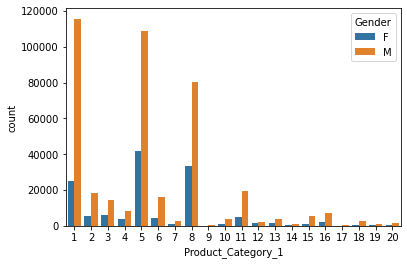

In [270]:
sns.countplot(newdf["Product_Category_1"],hue=newdf["Gender"])

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

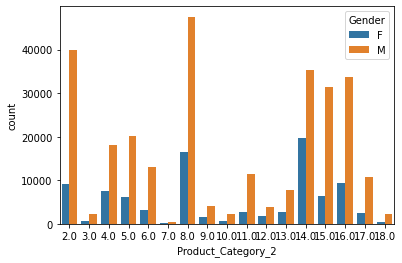

In [271]:
sns.countplot(newdf["Product_Category_2"],hue=newdf["Gender"])

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

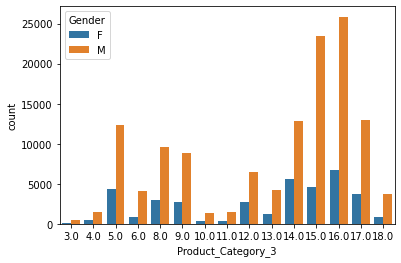

In [272]:
sns.countplot(newdf["Product_Category_3"],hue=newdf["Gender"])

# Exploring the purchase count with City and Age


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

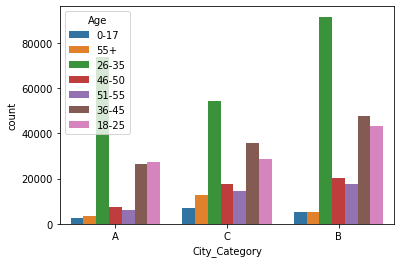

In [325]:
sns.countplot(newdf['City_Category'],hue=df['Age'])

# Exploring the purchase count with Gender and Age


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

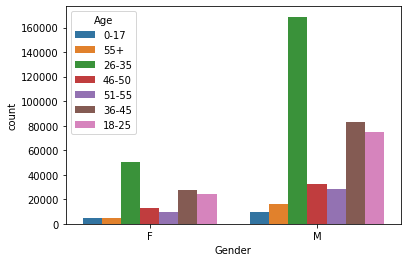

In [327]:
sns.countplot(newdf['Gender'],hue=df['Age'])

# Exploring the purchase count with Marital status and Age


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

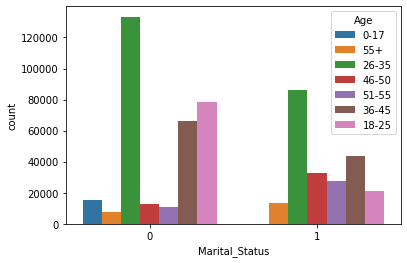

In [328]:
sns.countplot(newdf['Marital_Status'],hue=df['Age'])

# Exploring the purchase count with Occupation and Age


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

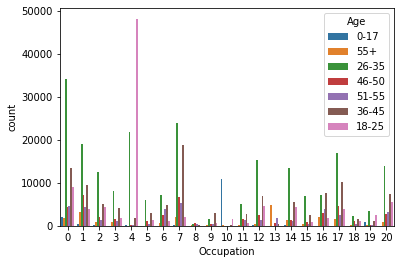

In [329]:
sns.countplot(newdf['Occupation'],hue=df['Age'])

# Exploring the purchase count with product categories and Age


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

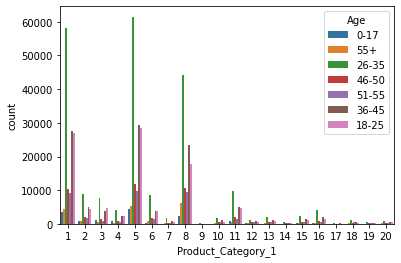

In [330]:
sns.countplot(newdf['Product_Category_1'],hue=df['Age'])

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

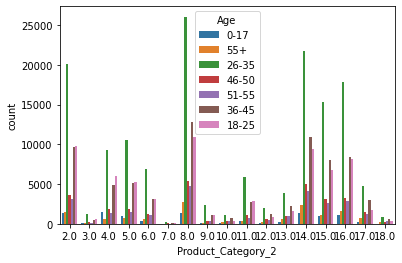

In [331]:
sns.countplot(newdf['Product_Category_2'],hue=df['Age'])

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

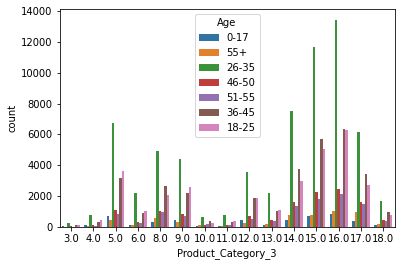

In [332]:
sns.countplot(newdf['Product_Category_3'],hue=df['Age'])

# Exploring the purchase count with Occupation and Marital Status


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

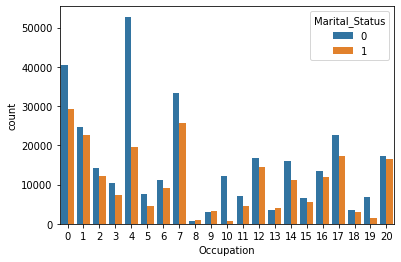

In [326]:
sns.countplot(newdf["Occupation"],hue=newdf["Marital_Status"])

# Exploring the purchase count with City and marital status


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

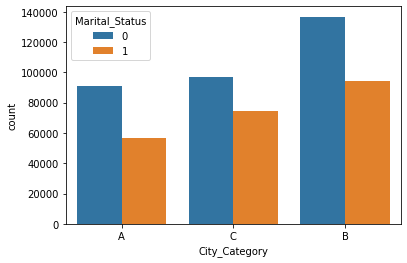

In [274]:
sns.countplot(newdf["City_Category"],hue=newdf["Marital_Status"])

# Exploring the purchase count with product categories and marital status


C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

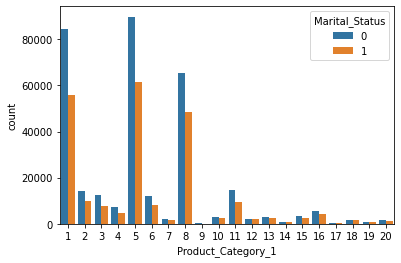

In [275]:
sns.countplot(newdf["Product_Category_1"],hue=newdf["Marital_Status"])

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

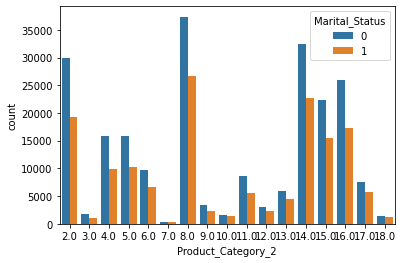

In [276]:
sns.countplot(newdf["Product_Category_2"],hue=newdf["Marital_Status"])

C:\Users\M S DEEPA\anaconda3\envs\semester_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

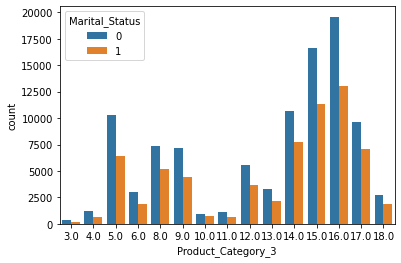

In [277]:
sns.countplot(newdf["Product_Category_3"],hue=newdf["Marital_Status"])

# purchase distribution w.r.t gender, marital status and city


# Gender

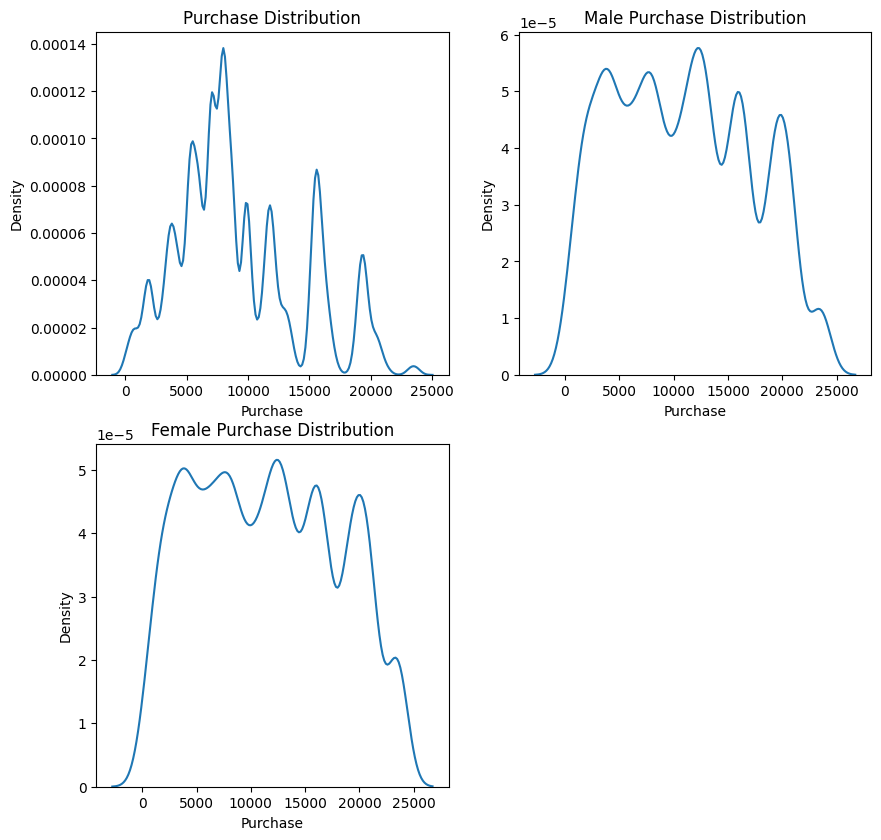

In [278]:
male = df[df['Gender'] == 1].value_counts('Purchase')
female = df[df['Gender'] == 0].value_counts('Purchase')

plt.figure(figsize=(10,10),dpi=100);
plt.subplot(2,2,1)
plt.title('Purchase Distribution')
sns.kdeplot(x='Purchase',data=df)

plt.subplot(2,2,2)
plt.title('Male Purchase Distribution')
sns.kdeplot(x='Purchase',data=male)

plt.subplot(2,2,3)
plt.title('Female Purchase Distribution')
sns.kdeplot(x='Purchase',data=female);



# Marital Status

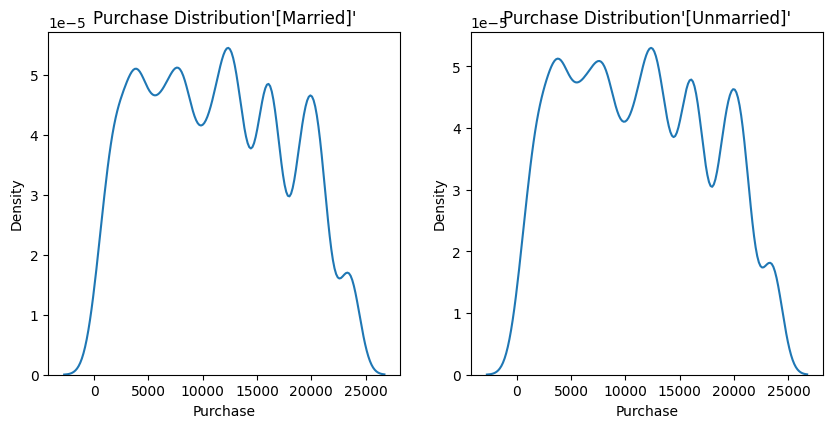

In [279]:
married = df[df['Marital_Status'] == 1].value_counts('Purchase')
unmarried = df[df['Marital_Status'] == 0].value_counts('Purchase')

plt.figure(figsize=(10,10),dpi=100);

plt.subplot(2,2,1)
plt.title("Purchase Distribution'[Married]'")
sns.kdeplot(x='Purchase',data=married)

plt.subplot(2,2,2)
plt.title("Purchase Distribution'[Unmarried]'")
sns.kdeplot(x='Purchase',data=unmarried);

In [ ]:

Age
   * Most Visited are 18-25 and least visited are 0-17
Gender
  * Male has more count than Female
  * Also Male has more purchase power than female
City Category
  * People visiting the store maximum are from City Category B
  * Least People visiting the store are from City Category A
   In least and most visited store in different cities Men has purchased more than Women
City
  * Maximum people visiting the store are from City B
  * Least visited is City A
Marital Status
  * Unmarried people are visiting the store more than married people.
  * In Marriage also Men are purchasing more than women
Products
  * In both Product1 and Product2 the 10th product is more purchased
  * In Product3 3rd product is more purchased than others

# Standard Deviation

In [333]:
Standard_deviation=df['Purchase'].std()
Standard_deviation

5023.065393820582